In [1]:
from qiskit import Aer, QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector

In [2]:
qc = QuantumCircuit(2)

qc.x(0)      # q0 = NOT(q0)
qc.h(1)      # q1 = H(q1)
# Entangle the qubits 0 and 1.
qc.cx(1, 0)  # q0 = XOR(q0, q1)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw(output='latex')

<IPython.core.display.Latex object>

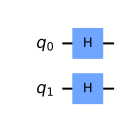

<IPython.core.display.Latex object>

In [3]:
qc = QuantumCircuit(2)

qc.h(0)      # q0 = H(q0)
qc.h(1)      # q1 = H(q1)

display(qc.draw(output='mpl'))

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw(output='latex')

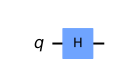

<IPython.core.display.Latex object>

In [4]:
qc = QuantumCircuit(1)

qc.h(0)      # q0 = H(q0)

display(qc.draw(output='mpl'))

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
display(ket.draw(output='latex'))

In [5]:
sim = AerSimulator() # Create a new simulator object

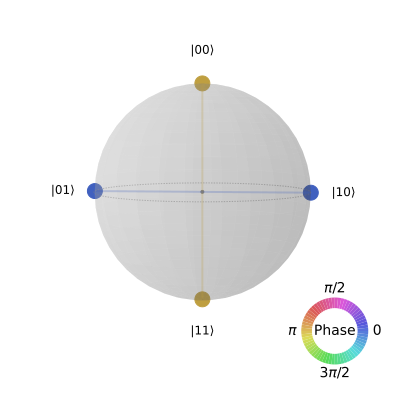

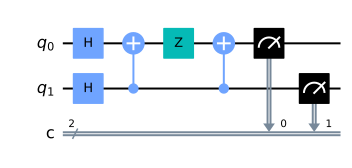

{'11': 266, '01': 252, '10': 231, '00': 275}

In [6]:
qc = QuantumCircuit(2, 2)

# Everything after the H gate will change the state vector, but not the
# measurements.
qc.h(0)          # q0 = H(q0)
qc.h(1)          # q1 = H(q1)
# This has no effect:
qc.cx(1, 0)      # q0 = XOR(q1, q0)
# But it has:
qc.z(0)          # q0 = -|1> of q0 is |1>, |0> otherwise
# Now we can perform cx:
qc.cx(1, 0)      # q0 = XOR(q1, q0)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'.
# We can't use the Statevector after measuring.
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
display(ket.draw(output='qsphere')) # Use LaTeX to draw the ket.

qc.measure(0, 0) # b0 = q2
qc.measure(1, 1) # b1 = q3
display(qc.draw(output='mpl')) # Draw the cirtuit to an SVG.

job = sim.run(qc)     # run the experiment
result = job.result() # get the results
result.get_counts()